In [8]:
import math
import numpy as np
import ppsim as pp
import random
from tqdm import tqdm

a,b,u = pp.species('A B U')
rxns = [
    a+b >> 2*u,
    a+u >> 2*a,
    b+u >> 2*b,
]
pop_exponent = 2
n = 10 ** pop_exponent
p = 0.51 # TODO: restore this
# p = 0.5
a_init = int(n * p)
b_init = n - a_init
inits = {a: a_init, b: b_init}
sim = pp.Simulation(inits, rxns)

r = 2
u = 0.713
sim.simulator.sample_collision(r, u, has_bounds=False, pp=True)

8

In [ ]:
import math
import numpy as np
import ppsim as pp
import random
from tqdm import tqdm

print('a')

a,b,u = pp.species('A B U')
rxns = [
    a+b >> 2*u,
    a+u >> 2*a,
    b+u >> 2*b,
]

print('b')

trials_exponent = 2
pop_exponent = 2
n = 10 ** pop_exponent
p = 0.51 # TODO: restore this
# p = 0.5
a_init = int(n * p)
b_init = n - a_init
inits = {a: a_init, b: b_init}
trials = 10 ** trials_exponent

print('c')

sim = pp.Simulation(inits, rxns)

print('d')

r = math.ceil(math.sqrt(n))
ls_pp = []
ls_dir = []

print('e')

for i in range(trials):
    print(f'iteration {i}:')
    
    # l_dir = sample_collision(n, r)
    # ls_dir.append(l_dir)
    # print(f'{ls_dir=}')
    
    u = random.random()
    l_pp = sim.simulator.sample_collision(r, u)
    ls_pp.append(ls_pp)
    print(f'{ls_pp=}')
    

ls_pp = np.array(ls_pp)
ls_dir = np.array(ls_dir)
print(f'{ls_pp=}')
print(f'{ls_dir=}')

In [ ]:
print(f'{ls_pp=}')

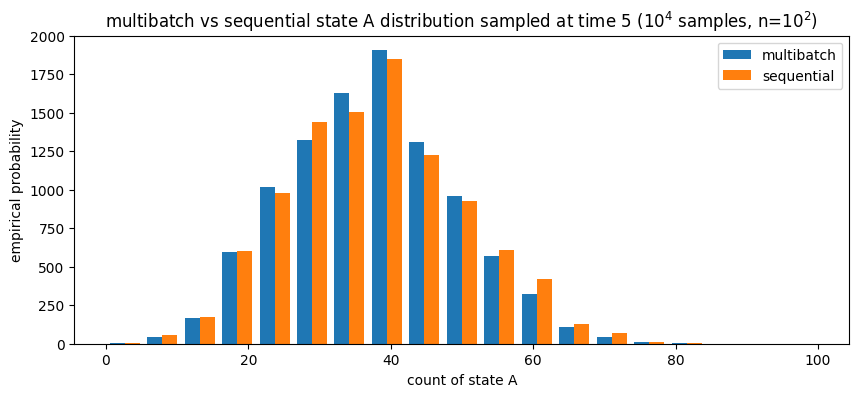

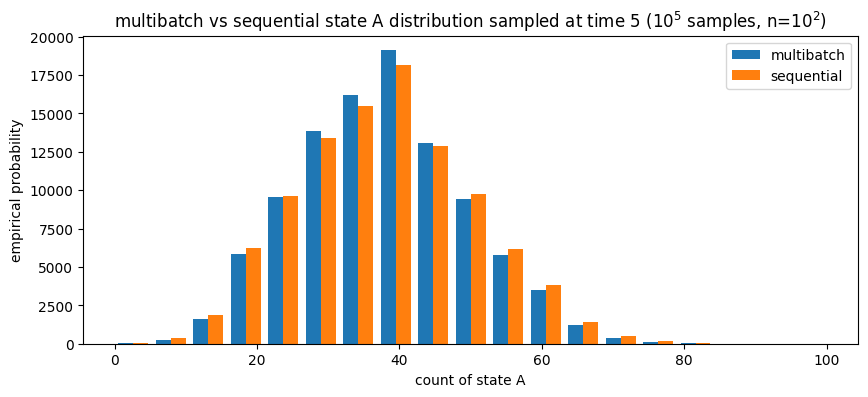

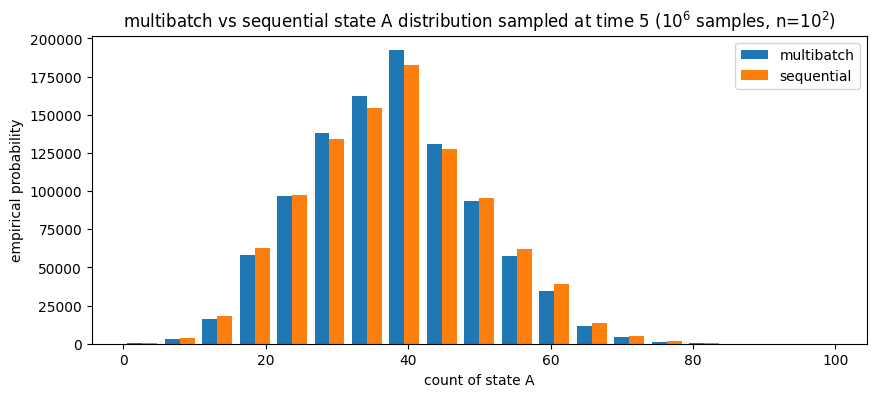

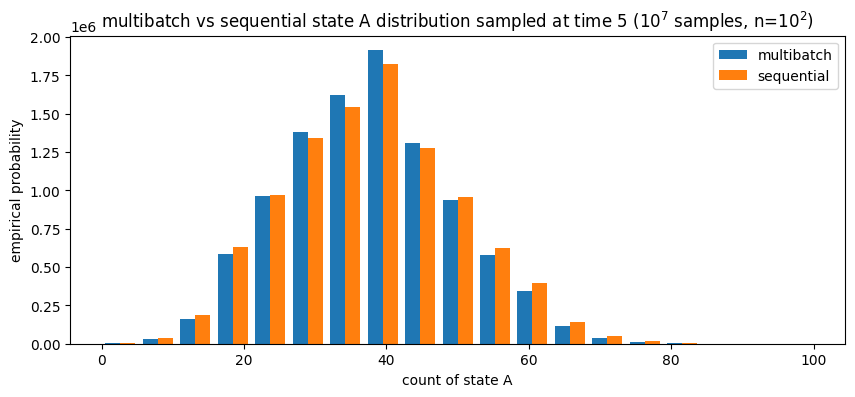

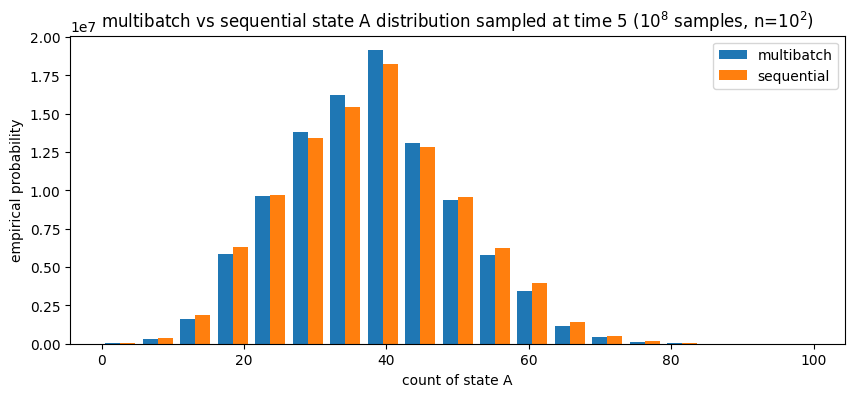

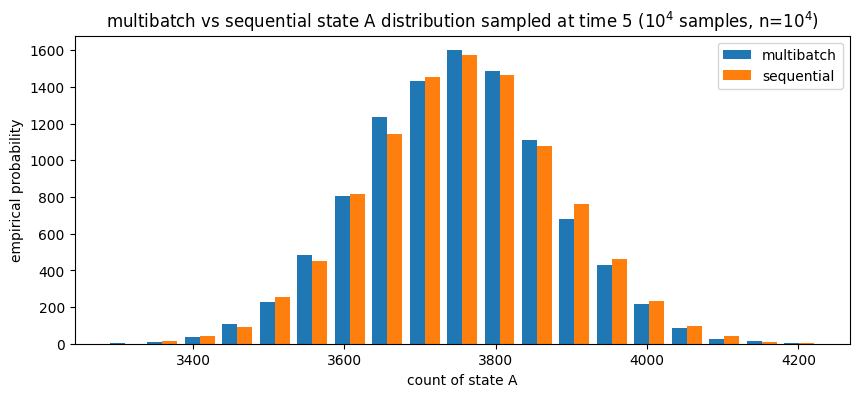

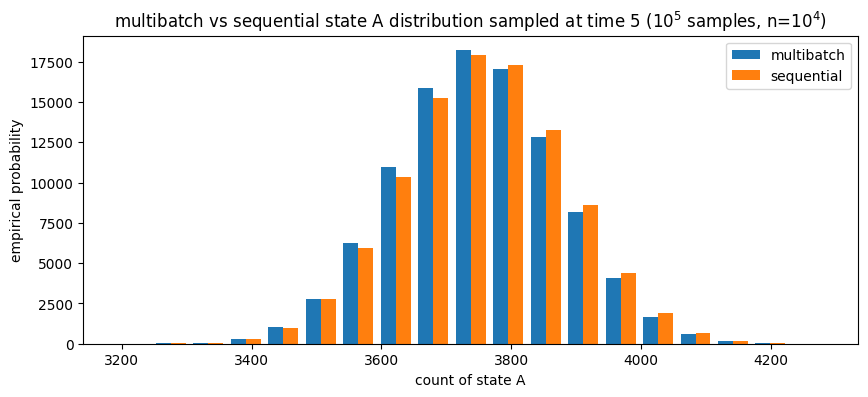

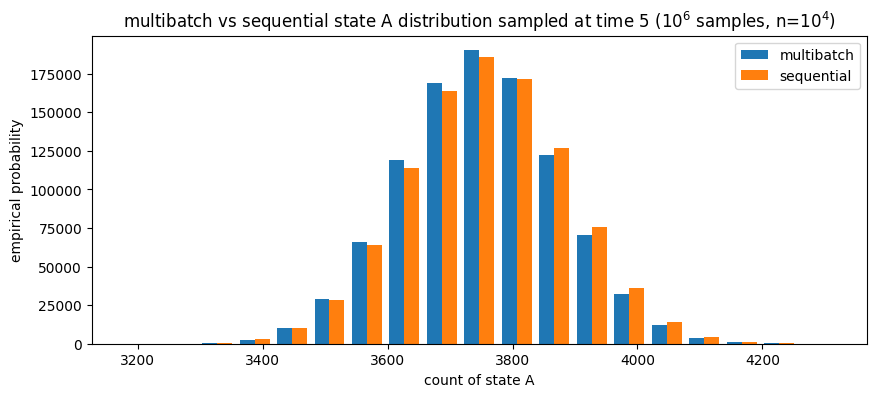

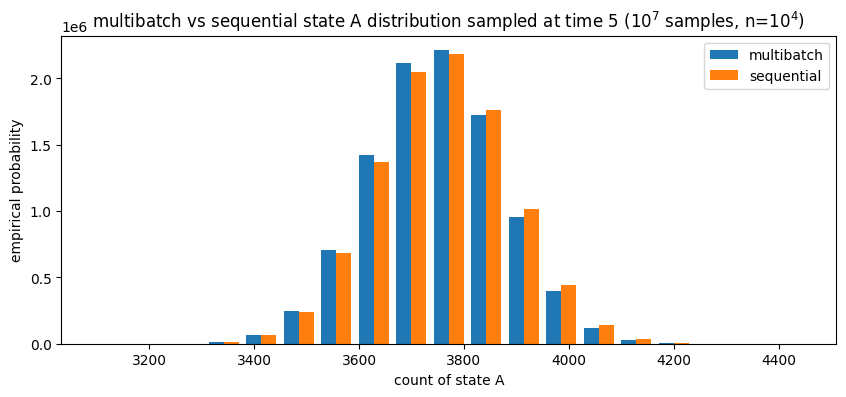

In [1]:
# This cell reads JSON data from files named like multibatch_samples_n10e2_trials10e4_bt-n-over-2.json
# and sequential_samples_n10e2_trials10e4.json and plots a comparative histogram, optionally saving 
# the histogram to a PDF file.

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import json

def get_values(fn: str, state: str) -> npt.NDArray[np.uint64]:
    with open(fn, 'r') as f:
        data_dict = json.load(f)
    data = {int(val): count for val, count in data_dict[state].items()}
    values = []
    for value, count in data.items():
        values.extend([value] * count)
    return np.array(values, dtype=np.uint64)

def compare(fn1: str, fn2: str, state: str, end_time: int, save: bool = False, fn_append: str = ''):
    simulator1 = fn1[:fn1.index('_')]
    simulator2 = fn2[:fn2.index('_')]
    vals1 = get_values(fn1, state)
    vals2 = get_values(fn2, state)
    min_val = int(min(vals1.min(), vals2.min()))
    max_val = int(min(vals1.max(), vals2.max()))

    
    next_pow_10 = 1
    while next_pow_10 < max_val:
        next_pow_10 *= 10
    
    if min_val <= 0.1 * next_pow_10:
        min_val = 0
    if max_val >= 0.9 * next_pow_10:
        max_val = next_pow_10
    if min_val <= 0.25 * next_pow_10 and max_val >= 0.75 * next_pow_10:
        min_val = 0
        max_val = next_pow_10
    
    fig, ax = plt.subplots(figsize = (10,4))
    bins = np.linspace(min_val, max_val, 20)
    _=ax.hist([vals1, vals2], label=[simulator1, simulator2], bins=bins)
    ax.legend()
    ax.set_xlabel(f'count of state {state}')
    ax.set_ylabel(f'empirical probability')
    ax.set_title(f'{simulator1} vs {simulator2} state {state} distribution sampled at time {end_time} ($10^{trials_exponent}$ samples, n=$10^{pop_exponent}$)')
    if save:
        pdf_fn = f'{simulator1}_vs_{simulator2}{fn_append}.pdf'
        plt.savefig(pdf_fn, bbox_inches='tight')
    plt.show()
    
state = 'A'
end_time = 5

for pop_exponent in [2,4]:
    for trials_exponent in [4,5,6,7,8]:
        if pop_exponent == 4 and trials_exponent == 8:
            break
        exp_str = f'_n10e{pop_exponent}_trials10e{trials_exponent}'
        mb_fn  = f'multibatch_samples{exp_str}_bt-n-over-2.json'
        seq_fn = f'sequential_samples{exp_str}.json'
        compare(mb_fn, seq_fn, state, end_time, save=True, fn_append=f'{exp_str}_bt-n-over-2')